# import

In [2]:
!pip install qulacs

## Qulacsのエラーが正常に出力されるようになります。
!pip3 install wurlitzer
%load_ext wurlitzer
!pip install qulacsvis
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 737 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 518 kB 7.3 MB/s 
     |████████████████████████████████| 3.2 MB 43.0 MB/s 
     |████████████████████████████████| 11.2 MB 36.8 MB/s 
     |████████████████████████████████| 965 kB 72.2 MB/s 
  Created wheel for temp: filename=temp-2020.7.2-py3-none-any.whl size=1278 sha256=cfb212075d8c88d677469385ca11e4d07e579eb69e2a4378a17e2e277b95a79c
  Stored in directory: /root/.cache/pip/wheels/13/84/90/c2d1ebfb9263f280df2aa51ddb0063098f919c4221ea5b3271
Successfully built temp
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qulacsvis 0.2.2 requires matplotlib<4.0.0,>=3.4.3, but you have matplotlib 3.1.3 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import tensorflow as tf

# データ読み込み

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# 前処理

In [5]:
print(f'train_images : {train_images.shape}\n\
train_labels : {train_labels.shape}\n\
test_images : {test_images.shape}\n\
test_labels : {test_labels.shape}')

train_images : (60000, 28, 28)
train_labels : (60000,)
test_images : (10000, 28, 28)
test_labels : (10000,)


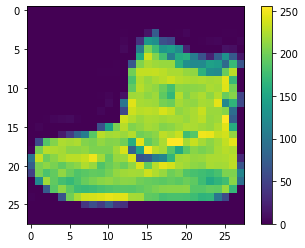

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

0 から 1 の範囲にスケーリング

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

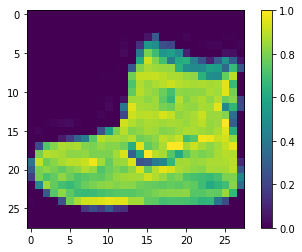

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 解像度変更

In [10]:
n=7
img = train_images[0]
img_28x7=np.zeros((28,4))
for i in range(0,28):
  for j in range(0,28,n):
    img_28x7[i][j//n] = np.mean(img[i][j:j+n])

img_7x7=np.zeros((4,4))
for i in range(0,28,n):
  for j in range(0,4):
    img_7x7[i//n][j] = np.mean([img_28x7[ii][j] for ii in range(i,i+n) ])


In [11]:
img_7x7.shape

(4, 4)

In [12]:
img_7x7

array([[0.00000000e+00, 8.00320128e-04, 2.09043617e-01, 4.20168067e-02],
       [0.00000000e+00, 1.22288916e-01, 8.42416967e-01, 6.64265706e-01],
       [4.25050020e-01, 6.80192077e-01, 8.06322529e-01, 7.42376951e-01],
       [2.89795918e-01, 4.90276110e-01, 4.49459784e-01, 3.37895158e-01]])

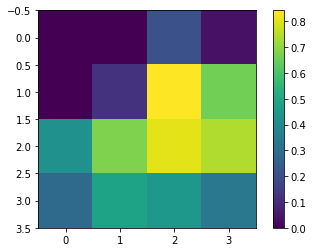

In [13]:
plt.figure()
plt.imshow(img_7x7)
plt.colorbar()
plt.grid(False)
plt.show()

## 畳み込み

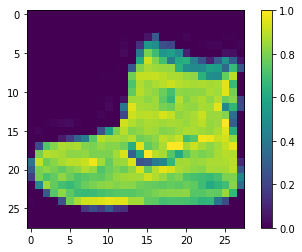

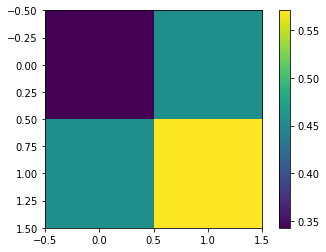

In [14]:

size=(3, 3) # kernel_size
averaging3x3_kernel = np.full(size, 1 / (size[0] * size[1]))


def convolve2d(image, kernel):
  shape = (image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1) + kernel.shape
  strides = image.strides * 2
  strided_image = np.lib.stride_tricks.as_strided(image, shape, strides)
  return np.einsum('kl,ijkl->ij', kernel, strided_image)

img_3x3 = convolve2d(img_7x7, averaging3x3_kernel)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(img_3x3)
plt.colorbar()
plt.grid(False)
plt.show()


In [15]:
img_3x3

array([[0.34290161, 0.45663599],
       [0.45620026, 0.57061047]])

# 関数化

In [16]:
def change(img, N):
  n=4
  m=int(28/n)
  img_28x7=np.zeros((28,n))
  for i in range(0,28):
    for j in range(0,28,m):
      img_28x7[i][j//m] = np.mean(img[i][j:j+m])

  img_7x7=np.zeros((n,n))
  for i in range(0,28,m):
    for j in range(0,n):
      img_7x7[i//m][j] = np.mean([img_28x7[ii][j] for ii in range(i,i+m) ])
  size=(N, N) # kernel_size
  averaging3x3_kernel = np.full(size, 1 / (size[0] * size[1]))


  def convolve2d(image, kernel):
    shape = (image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1) + kernel.shape
    strides = image.strides * 2
    strided_image = np.lib.stride_tricks.as_strided(image, shape, strides)
    return np.einsum('kl,ijkl->ij', kernel, strided_image)

  img_3x3 = convolve2d(img_7x7, averaging3x3_kernel)
  return img_3x3


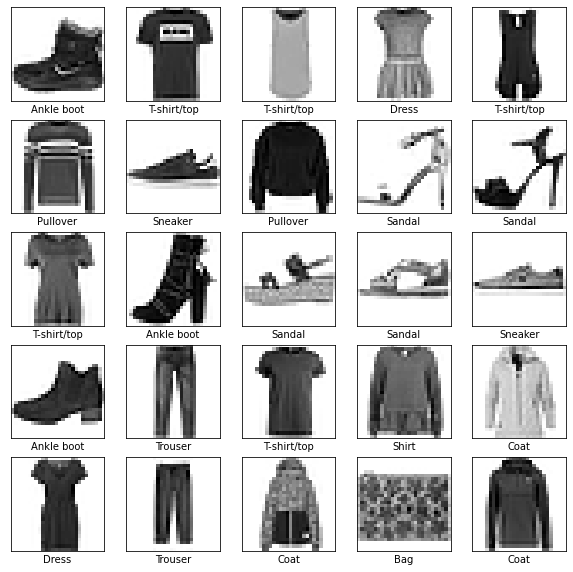

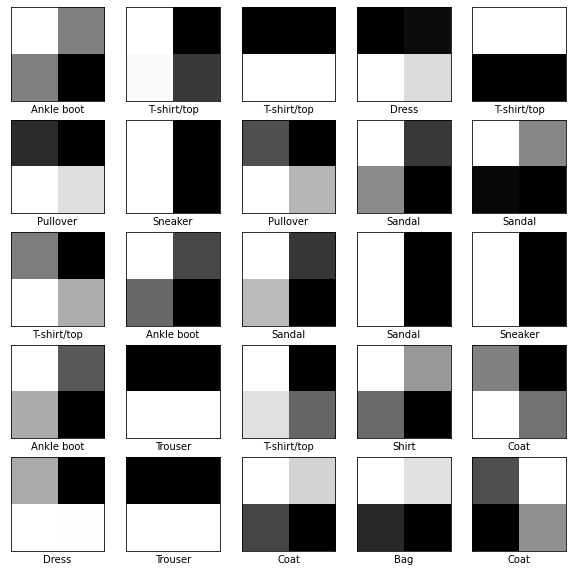

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

img_list = []
for i in range(25):
  img = train_images[i]
  img_list.append(change(img,3))


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [18]:
type(train_images)

numpy.ndarray

In [19]:
train_images_changed=np.zeros((len(train_images),2,2))
test_images_changed=np.zeros((len(test_images),2,2))

for i in range(len(train_images)):
  train_images_changed[i]=change(train_images[i],3)
  if i%5000==0:
    print(i)
for i in range(len(test_images)):
  test_images_changed[i]=change(test_images[i],3)



0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


In [20]:
# ラベルまとめ　4値分類
def label_change(labels):
  new_label_list = [0, 1, 0, 0, 0, 2, 0, 2, 3, 2]
  new_labels=labels
  for i in range(len(new_label_list)):
    new_labels = np.where(new_labels==i, new_label_list[i], new_labels)
    print(i,new_label_list[i])
  return new_labels

train_labels_changed = label_change(train_labels)
test_labels_changed = label_change(test_labels)

0 0
1 1
2 0
3 0
4 0
5 2
6 0
7 2
8 3
9 2
0 0
1 1
2 0
3 0
4 0
5 2
6 0
7 2
8 3
9 2


# 古典機械学習

In [21]:
# バッグあり
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2, 2)),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images_changed, train_labels_changed, epochs=20)

test_loss, test_acc = model.evaluate(test_images_changed,  test_labels_changed, verbose=2)

print('\nTest accuracy:', test_acc)

2022-11-14 04:15:58.074801: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8207 - accuracy: 0.6866
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5588 - accuracy: 0.7893
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4853 - accuracy: 0.8050
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4514 - accuracy: 0.8263
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4354 - accuracy: 0.8407
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4250 - accuracy: 0.8499
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8541
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4143 - accuracy: 0.8560
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4116 - accuracy: 0.8566
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.408

# QCL

In [22]:
!pip install skqulacs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached qulacs-0.5.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (737 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: qulacs
    Found existing installation: Qulacs 0.3.1
    Uninstalling Qulacs-0.3.1:
      Successfully uninstalled Qulacs-0.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
spacy 3.4.2 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
qulac

In [23]:
train_images_4=train_images_changed.reshape([len(train_images_changed), 4])
test_images_4=test_images_changed.reshape([len(test_images_changed), 4])

In [25]:
from skqulacs.circuit.pre_defined import create_qcl_ansatz
from skqulacs.qnn import QNNClassifier
from skqulacs.qnn.solver import Bfgs
nqubit = 4                      # qubitの数。必要とする入力、出力の次元数以上が必要である。
c_depth = 3                     # circuitの深さ。ニューラルネットワークでの隠れ層に対応する。
time_step = 1.                  # qcl_ansatz に必要となるパラメータ。横磁場イジングモデルによって発展させる時間を決める。
num_class = 4                   # 分類数（ここでは3つの品種に分類）
solver = Bfgs()                 # アルゴリズム。ほかには、`Adam()` や"Nelder-Mead" が使える。
maxiter = 10                    # ループの最大。これが多いほど、正確になるが、時間がかかる。
circuit = create_qcl_ansatz(nqubit, c_depth, time_step)     # LearningCircuitを作る
qcl = QNNClassifier(circuit, num_class, solver)     # モデル構築を行う
opt_loss, opt_params = qcl.fit(x_train = train_images_4, y_train = train_labels_changed, maxiter = maxiter)                          # 学習
print("trained parameters", opt_params)
print("loss", opt_loss)

trained parameters [ 4.19969626  1.12027594 -0.25693345 -0.18501476  5.20842774  5.5647573
  3.18489488  4.27585829  3.76795819  6.21128768  4.48260634  0.1296879
  5.36477141  0.94333003  4.7240673   1.81516833  5.4013112   3.93176193
  1.3149189   3.11438199  0.90714664  0.88673868  3.51177396  4.01755446
  4.51473204  2.51644494  5.77747451  6.1702618   4.51905275  4.35551119
  4.37736357  2.68082514  0.40630493  3.95747608  3.22732966  2.57675469]
loss 0.9663549405441072


In [26]:
from sklearn.metrics import accuracy_score
y_pred = qcl.predict(test_images_4)
print(accuracy_score(test_labels_changed, y_pred))

0.6354


# パラメータ変更

In [27]:
# maxiter=20 
nqubit = 4                      # qubitの数。必要とする入力、出力の次元数以上が必要である。
c_depth = 3                     # circuitの深さ。ニューラルネットワークでの隠れ層に対応する。
time_step = 1.                  # qcl_ansatz に必要となるパラメータ。横磁場イジングモデルによって発展させる時間を決める。
num_class = 4                   # 分類数（ここでは3つの品種に分類）
solver = Bfgs()                 # アルゴリズム。ほかには、`Adam()` や"Nelder-Mead" が使える。
maxiter = 20                    # ループの最大。これが多いほど、正確になるが、時間がかかる。
circuit = create_qcl_ansatz(nqubit, c_depth, time_step)     # LearningCircuitを作る
qcl = QNNClassifier(circuit, num_class, solver)     # モデル構築を行う
opt_loss, opt_params = qcl.fit(x_train = train_images_4, y_train = train_labels_changed, maxiter = maxiter)                          # 学習
print("trained parameters", opt_params)
print("loss", opt_loss)

y_pred = qcl.predict(test_images_4)
print(accuracy_score(test_labels_changed, y_pred))

trained parameters [ 4.16058008  0.91126395 -0.19402849 -0.70367535  5.15426182  5.48340998
  3.10320245  4.12099334  3.59438032  6.5789344   4.42457204  0.47995576
  5.39057823  1.17082252  4.97604354  2.24389088  5.69360034  4.40086691
  1.3216235   3.23769151  0.83546178  0.87722376  3.14295619  3.88542207
  4.42771058  2.42151092  5.69255531  6.21247152  4.68102659  4.38998424
  4.04152965  2.9910273   0.4300352   4.05189785  3.31140801  2.48835655]
loss 0.944085361035374
0.6344


In [31]:

# c_depth = 7
# time_step = 1.
# solver = Bfgs()
# maxiter = 12

nqubit = 4                      # qubitの数。必要とする入力、出力の次元数以上が必要である。
c_depth = 7                     # circuitの深さ。ニューラルネットワークでの隠れ層に対応する。
time_step = 1.                  # qcl_ansatz に必要となるパラメータ。横磁場イジングモデルによって発展させる時間を決める。
num_class = 4                   # 分類数（ここでは3つの品種に分類）
solver = Bfgs()                 # アルゴリズム。ほかには、`Adam()` や"Nelder-Mead" が使える。
maxiter = 12                    # ループの最大。これが多いほど、正確になるが、時間がかかる。
circuit = create_qcl_ansatz(nqubit, c_depth, time_step)     # LearningCircuitを作る
qcl = QNNClassifier(circuit, num_class, solver)     # モデル構築を行う
opt_loss, opt_params = qcl.fit(x_train = train_images_4, y_train = train_labels_changed, maxiter = maxiter)                          # 学習
print("trained parameters", opt_params)
print("loss", opt_loss)

y_pred = qcl.predict(test_images_4)
print(accuracy_score(test_labels_changed, y_pred))

trained parameters [4.23611069e+00 1.79303637e+00 2.34718882e-01 4.46050108e-03
 5.19710179e+00 5.82833168e+00 3.68865808e+00 4.03075839e+00
 3.10863793e+00 5.81859430e+00 5.05268150e+00 1.78743487e-01
 5.01036386e+00 4.09031005e-01 4.25089469e+00 5.88838030e-01
 5.32101859e+00 3.28457925e+00 2.08024226e+00 2.96496823e+00
 1.20190025e-01 6.41385405e-02 3.64791362e+00 3.83398615e+00
 3.93483004e+00 2.76316398e+00 6.45243904e+00 6.79244006e+00
 4.51919783e+00 4.51977801e+00 3.84410004e+00 2.36968352e+00
 6.77470288e-01 4.73188828e+00 3.23086506e+00 1.71148465e+00
 3.02131077e+00 5.57963419e+00 5.84629786e+00 2.28232997e+00
 3.64228841e+00 1.87933129e+00 3.72766723e+00 2.27264483e+00
 2.72615338e+00 5.82357484e+00 1.44606629e+00 3.60928454e+00
 4.10197188e-01 5.22951689e+00 4.74237820e+00 1.34971635e+00
 5.53600242e+00 8.94182000e-02 1.96614003e+00 9.85647901e-01
 2.70598595e+00 5.30806429e+00 1.80893334e+00 6.27360243e-01
 2.27666074e+00 1.31204420e+00 4.29614601e-01 3.25622676e+00
 2.13

In [33]:
# c_depth = 10
# time_step = 1.
# solver = Bfgs()
# maxiter = 12

nqubit = 4                      # qubitの数。必要とする入力、出力の次元数以上が必要である。
c_depth = 10                     # circuitの深さ。ニューラルネットワークでの隠れ層に対応する。
time_step = 1.                  # qcl_ansatz に必要となるパラメータ。横磁場イジングモデルによって発展させる時間を決める。
num_class = 4                   # 分類数（ここでは3つの品種に分類）
solver = Bfgs()                 # アルゴリズム。ほかには、`Adam()` や"Nelder-Mead" が使える。
maxiter = 12                    # ループの最大。これが多いほど、正確になるが、時間がかかる。
circuit = create_qcl_ansatz(nqubit, c_depth, time_step)     # LearningCircuitを作る
qcl = QNNClassifier(circuit, num_class, solver)     # モデル構築を行う
opt_loss, opt_params = qcl.fit(x_train = train_images_4, y_train = train_labels_changed, maxiter = maxiter)                          # 学習
print("trained parameters", opt_params)
print("loss", opt_loss)

y_pred = qcl.predict(test_images_4)
print(accuracy_score(test_labels_changed, y_pred))

trained parameters [ 4.13428673e+00  1.81105973e+00  4.65940648e-01 -3.19433419e-01
  5.20616748e+00  5.61553790e+00  3.87083532e+00  4.63418869e+00
  3.16932388e+00  5.53906105e+00  5.09591102e+00  3.24204560e-01
  5.28843718e+00  2.53639823e-01  4.48559735e+00  1.04234542e+00
  5.37613935e+00  3.28007409e+00  1.92613832e+00  2.48858600e+00
  1.78614880e-01  7.59572504e-01  4.08026158e+00  4.21499960e+00
  3.84239864e+00  2.50168721e+00  6.22683533e+00  6.29507039e+00
  4.59079870e+00  3.91320091e+00  4.28373658e+00  2.53014043e+00
  8.39636893e-01  4.60490307e+00  3.65353739e+00  1.94487575e+00
  3.12623612e+00  5.62389666e+00  5.94421222e+00  2.29595339e+00
  2.91251476e+00  2.05520064e+00  3.93035124e+00  2.16421784e+00
  2.72800477e+00  5.64191909e+00  1.24974597e+00  4.08062757e+00
  6.96299907e-01  5.37130281e+00  4.91718397e+00  1.40841520e+00
  5.38488296e+00  3.82864535e-01  2.31126904e+00  1.10311876e+00
  3.27629325e+00  5.04360856e+00  1.52590235e+00  2.64323135e-01
  2.10